In [1]:
def selection_sort(arr):
    comparisons = 0
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            comparisons += 1
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr, comparisons


def insertion_sort(arr):
    comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0:
            comparisons += 1
            if arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key
    return arr, comparisons


def merge_sort(arr):
    comparisons = 0

    def merge(left, right):
        nonlocal comparisons
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            comparisons += 1
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result.extend(left[i:])
        result.extend(right[j:])
        return result

    if len(arr) <= 1:
        return arr, comparisons

    mid = len(arr) // 2
    left, c1 = merge_sort(arr[:mid])
    right, c2 = merge_sort(arr[mid:])
    comparisons += c1 + c2

    return merge(left, right), comparisons

In [2]:
import random
import time
import csv

sizes = [50, 100, 150]
algorithms = {
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
    "Merge Sort": merge_sort
}

results = []

for size in sizes:
    base_data = random.sample(range(1, 1000), size)
    for name, algo in algorithms.items():
        data = base_data.copy()
        start = time.perf_counter()
        _, comparisons = algo(data)
        end = time.perf_counter()
        results.append([name, size, (end - start) * 1000, comparisons])

with open("sorting_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Algorithm", "Input Size", "Time (ms)", "Comparisons"])
    writer.writerows(results)

print("Sorting benchmark completed ✔")


Sorting benchmark completed ✔


In [3]:
def brute_force_search(text, pattern):
    comparisons = 0
    for i in range(len(text) - len(pattern) + 1):
        match = True
        for j in range(len(pattern)):
            comparisons += 1
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            return i, comparisons
    return -1, comparisons


def boyer_moore_search(text, pattern):
    comparisons = 0
    bad_char = {}
    for i in range(len(pattern)):
        bad_char[pattern[i]] = i

    shift = 0
    while shift <= len(text) - len(pattern):
        j = len(pattern) - 1
        while j >= 0:
            comparisons += 1
            if pattern[j] != text[shift + j]:
                shift += max(1, j - bad_char.get(text[shift + j], -1))
                break
            j -= 1
        if j < 0:
            return shift, comparisons
    return -1, comparisons


In [4]:
import string

text_sizes = [300, 500]
pattern = "abc"

results = []

for size in text_sizes:
    text = "".join(random.choice(string.ascii_lowercase) for _ in range(size))
    for name, algo in {
        "Brute Force": brute_force_search,
        "Boyer Moore": boyer_moore_search
    }.items():
        start = time.perf_counter()
        _, comparisons = algo(text, pattern)
        end = time.perf_counter()
        results.append([name, size, (end - start) * 1000, comparisons])

with open("string_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Algorithm", "Text Size", "Time (ms)", "Comparisons"])
    writer.writerows(results)

print("String matching benchmark completed ✔")


String matching benchmark completed ✔


In [5]:
import csv
import matplotlib.pyplot as plt

sorting_data = []
string_data = []

with open("sorting_results.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        sorting_data.append(row)

with open("string_results.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        string_data.append(row)


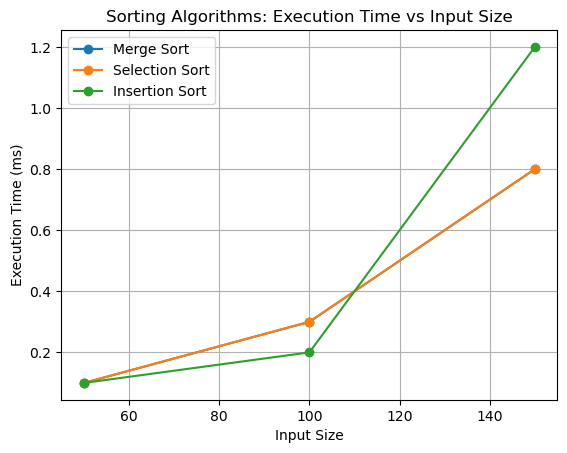

In [6]:
algorithms = set(row["Algorithm"] for row in sorting_data)
sizes = sorted(set(int(row["Input Size"]) for row in sorting_data))

for algo in algorithms:
    times = [
        float(row["Time (ms)"])
        for row in sorting_data
        if row["Algorithm"] == algo
    ]
    plt.plot(sizes, times, marker="o", label=algo)

plt.xlabel("Input Size")
plt.ylabel("Execution Time (ms)")
plt.title("Sorting Algorithms: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


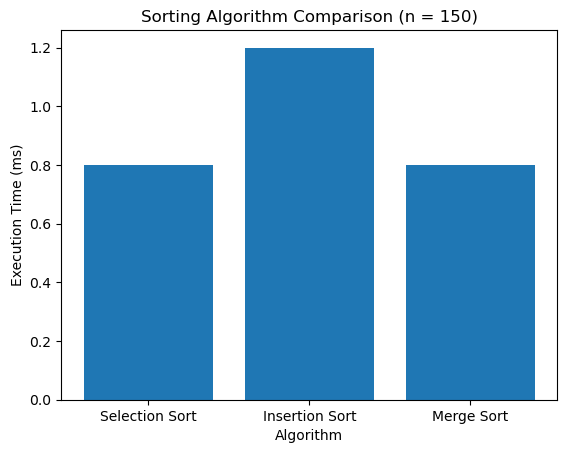

In [7]:
fixed_size = "150"
algos = []
times = []

for row in sorting_data:
    if row["Input Size"] == fixed_size:
        algos.append(row["Algorithm"])
        times.append(float(row["Time (ms)"]))

plt.bar(algos, times)
plt.xlabel("Algorithm")
plt.ylabel("Execution Time (ms)")
plt.title("Sorting Algorithm Comparison (n = 150)")
plt.show()


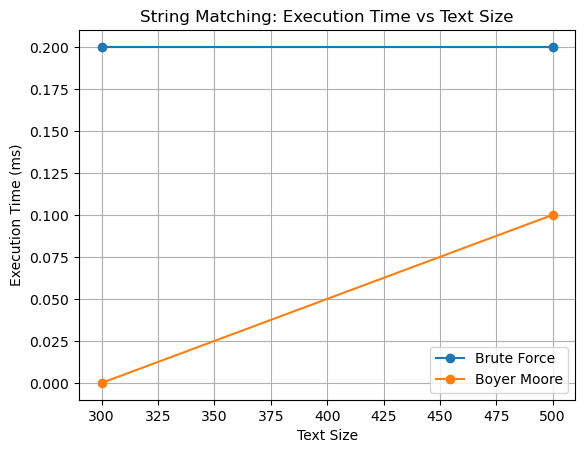

In [8]:
algorithms = set(row["Algorithm"] for row in string_data)
sizes = sorted(set(int(row["Text Size"]) for row in string_data))

for algo in algorithms:
    times = [
        float(row["Time (ms)"])
        for row in string_data
        if row["Algorithm"] == algo
    ]
    plt.plot(sizes, times, marker="o", label=algo)

plt.xlabel("Text Size")
plt.ylabel("Execution Time (ms)")
plt.title("String Matching: Execution Time vs Text Size")
plt.legend()
plt.grid(True)
plt.show()


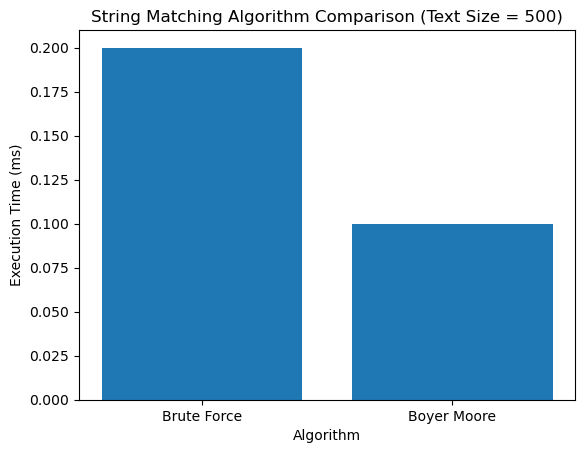

In [9]:
algos = []
times = []

for row in string_data:
    if row["Text Size"] == "500":
        algos.append(row["Algorithm"])
        times.append(float(row["Time (ms)"]))

plt.bar(algos, times)
plt.xlabel("Algorithm")
plt.ylabel("Execution Time (ms)")
plt.title("String Matching Algorithm Comparison (Text Size = 500)")
plt.show()
